In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
out_path = "../out/bert_teacher"

results_dict = {}

learning_rates = [2e-5, 5e-5, 8e-5]
n_epochs = [3]
hidden_dropout_probs = [0.2, 0.3]
attention_dropout_probs = [0.2, 0.3]
classifier_dropout_probs = [0.2, 0.3]

for epochs in n_epochs:
    if epochs not in results_dict:
        results_dict[epochs] = {}
    for learning_rate in learning_rates:
        if learning_rate not in results_dict[epochs]:
            results_dict[epochs][learning_rate] = {}
        for hidden_dropout in hidden_dropout_probs:
            if hidden_dropout not in results_dict[epochs][learning_rate]:
                results_dict[epochs][learning_rate][hidden_dropout] = {}
            for attention_dropout in attention_dropout_probs:
                if attention_dropout not in results_dict[epochs][learning_rate][hidden_dropout]:
                    results_dict[epochs][learning_rate][hidden_dropout][attention_dropout] = {}
                for classifier_dropout in classifier_dropout_probs:
                    if classifier_dropout not in results_dict[epochs][learning_rate][hidden_dropout][attention_dropout]:
                        results_dict[epochs][learning_rate][hidden_dropout][attention_dropout][classifier_dropout] = {}
                    result_dir = f'temp_e{int(epochs)}_lr{int(float(learning_rate) * 100000)}_hd{int(hidden_dropout * 100):03d}_ad{int(attention_dropout * 100):03d}_cd{int(classifier_dropout * 100):03d}'
                    results_path = os.path.join(out_path, result_dir, "results/results.json")
                    try:
                        with open(results_path, 'r') as file:
                            results = json.load(file)
                            results_dict[epochs][learning_rate][hidden_dropout][attention_dropout][classifier_dropout] = results
                    except FileNotFoundError:
                        print(f"Results file not found for version: {result_dir}")
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON for version: {result_dir}")


In [30]:
# plot f1 by learning rate and dropout probabilities
f1s = np.zeros((len(learning_rates), len(hidden_dropout_probs), len(attention_dropout_probs), len(classifier_dropout_probs)))
for i, lr in enumerate(learning_rates):
    for j, hd in enumerate(hidden_dropout_probs):
        for k, ad in enumerate(attention_dropout_probs):
            for l, cd in enumerate(classifier_dropout_probs):
                f1s[i, j, k, l] = results_dict[3][lr][hd][ad][cd]['f1_score']

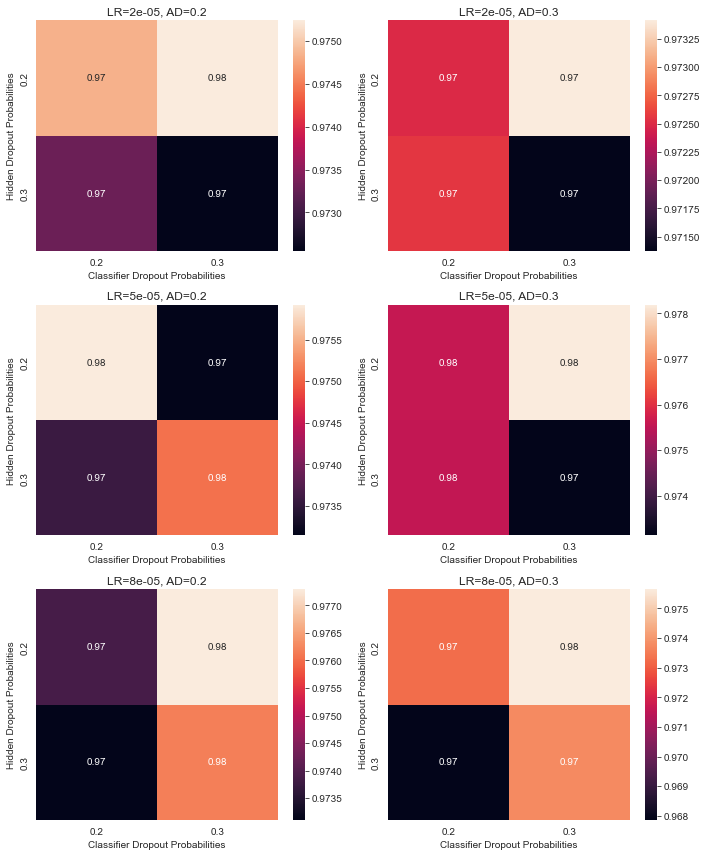

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'f1s', 'learning_rates', 'hidden_dropout_probs', 'attention_dropout_probs', and 'classifier_dropout_probs' are defined

# Number of learning rates and attention dropout probabilities
n_lr = len(learning_rates)
n_ad = len(attention_dropout_probs)

# Create a figure to hold the subplots
fig, axs = plt.subplots(n_lr, n_ad, figsize=(n_ad*5, n_lr*4))

# Iterate over each combination of learning rates and attention dropout probabilities
for i, lr in enumerate(learning_rates):
    for j, ad in enumerate(attention_dropout_probs):
        # Slice the data for a specific lr and ad
        f1_slice = f1s[i, :, j, :]

        # Select the appropriate subplot
        if n_lr > 1 and n_ad > 1:
            ax = axs[i, j]
        elif n_lr > 1:
            ax = axs[i]
        else:
            ax = axs[j]

        # Plot heatmap
        sns.heatmap(f1_slice, annot=True, fmt=".2f", xticklabels=classifier_dropout_probs, yticklabels=hidden_dropout_probs, ax=ax)
        ax.set_title(f'LR={lr}, AD={ad}')
        ax.set_xlabel('Classifier Dropout Probabilities')
        ax.set_ylabel('Hidden Dropout Probabilities')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [51]:
print(results_dict[3][5e-5][0.2][0.3][0.3]['f1_score'])
print(results_dict[3][5e-5][0.2][0.3][0.3]['nll_score'])
print(results_dict[3][5e-5][0.2][0.3][0.3]['average_inference_time'])
print(results_dict[3][5e-5][0.2][0.3][0.3]['accuracy_score'])

0.9781871061560833
0.10146628728281493
58.722939579788964
0.9636803874092009
